# Circle fitting using Gauss-Newton method

In [53]:
import plotly.express as px
import numpy as np 


num_samples = 10

# make a simple unit circle 
# theta = np.linspace(0, 2*np.pi, num_samples)
theta = 2*np.pi * np.random.rand(num_samples)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = 50 + 5 * (0.5 - np.random.rand((num_samples)))
x, y = r * np.cos(theta), r * np.sin(theta)

print(x)
print(y)

In [64]:
def residual(p : list) -> float:
    assert(len(p) == 3)
    return np.sqrt(np.power(np.array(x) - p[0], 2) + np.power(np.array(y) - p[1], 2)) - p[2]

In [65]:
p = [0,0,50]
residual(p)

array([-0.57425452, -1.86783725,  0.54556148,  1.11038931, -0.53978603,
       -1.1010505 ,  0.90418389,  0.92317104, -0.92133147, -0.24505374])

In [66]:
def jacobian(p : list) -> np.array:
    return np.array([[-(x_ - p[0]) / np.sqrt((x_ - p[0]) ** 2 + (y_ - p[1]) ** 2),
                    -(y_ - p[1]) / np.sqrt((x_ - p[0]) ** 2 + (y_ - p[1]) ** 2),
                    -1] for x_, y_ in zip(x,y)])

In [67]:
jacobian(p)

array([[ 0.8618035 ,  0.50724227, -1.        ],
       [-0.97744262,  0.21120115, -1.        ],
       [ 0.46577706, -0.8849021 , -1.        ],
       [-0.99923822,  0.03902542, -1.        ],
       [ 0.41065056,  0.9117928 , -1.        ],
       [ 0.4874119 ,  0.87317217, -1.        ],
       [-0.11432805,  0.99344305, -1.        ],
       [ 0.63891456, -0.76927771, -1.        ],
       [-0.86703958, -0.49823927, -1.        ],
       [-0.90382167,  0.42790932, -1.        ]])

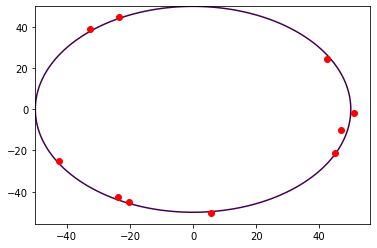

Residual norm: 3.0710850618316488


In [68]:
from matplotlib import pyplot as plt
 
import scipy.linalg as la

def plot_guess(p):
    plt.plot(x, y, 'ro')
    
    ex = np.linspace((p[0] - p[2]), (p[0] + p[2]), 100)
    ey = np.linspace((p[1] - p[2]), (p[1] + p[2]), 100)
    X, Y = np.meshgrid(ex,ey)
    F = (X - p[0])**2 + (Y-p[1])**2 - p[2] ** 2
    plt.contour(X,Y,F,[0])
    
    plt.show()
    print("Residual norm:", la.norm(residual(p), 2))

plot_guess([0, 0, 50])

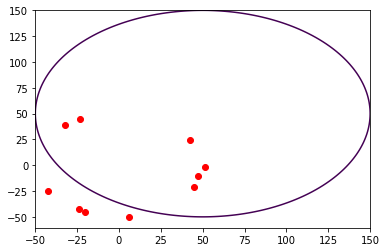

Residual norm: 110.4419661166756


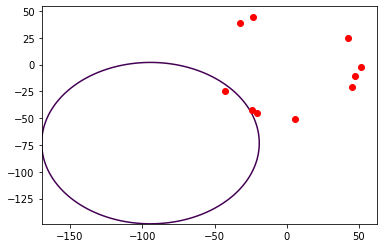

Residual norm: 636.9024134798838


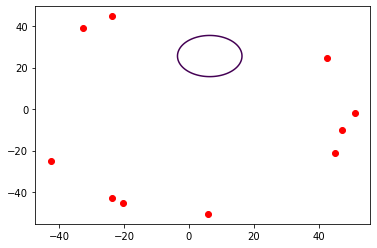

Residual norm: 219.3320237607104


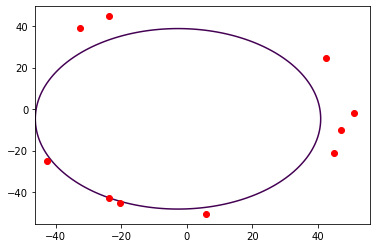

Residual norm: 22.562906224863067


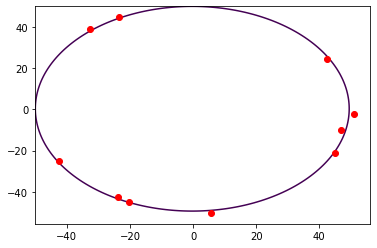

Residual norm: 2.9103298588462945


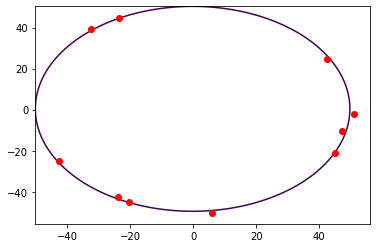

Residual norm: 2.8624132707657273


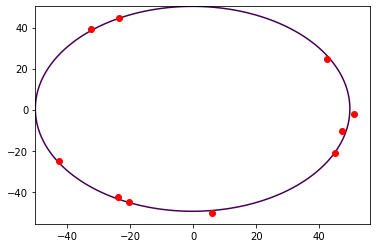

Residual norm: 2.86241306004016


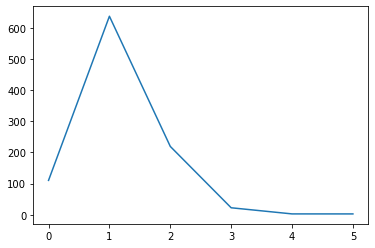

In [89]:
p = [50, 50, 100]
r_list = []
plt.figure()
plot_guess(p)
for i in range(6):
    plt.figure()
    r = residual(p)
    r_list.append(la.norm(r, 2))
    p = p + la.lstsq(jacobian(p), -residual(p))[0]
    
    plot_guess(p)

plt.plot(range(len(r_list)), r_list)

In [93]:
def gauss_newton_method(jacobian, r):
    j_t = np.transpose(jacobian)
    jtj_inv = np.linalg.pinv(np.matmul(j_t, jacobian))
    return - np.matmul(np.matmul(jtj_inv, j_t), r)

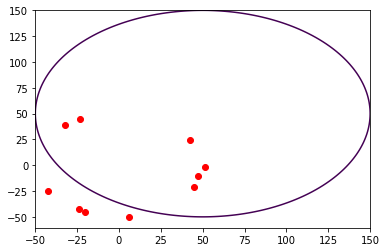

Residual norm: 110.4419661166756


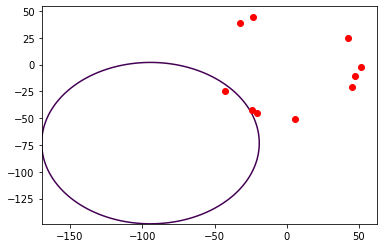

Residual norm: 636.9024134798705


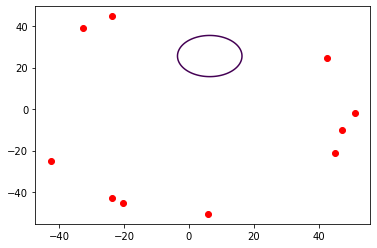

Residual norm: 219.33202376086734


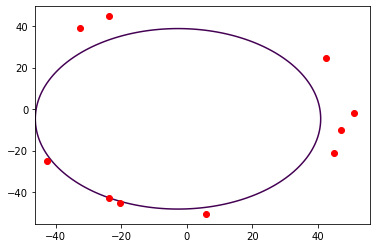

Residual norm: 22.5629062249271


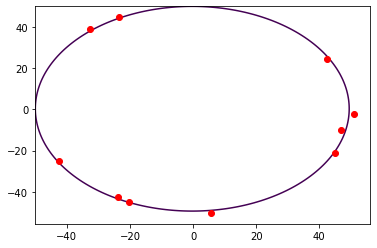

Residual norm: 2.910329858846848


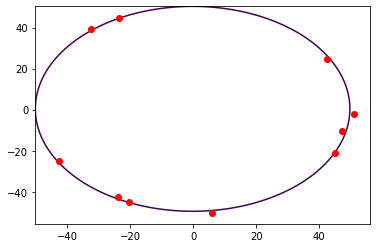

Residual norm: 2.8624132707657273


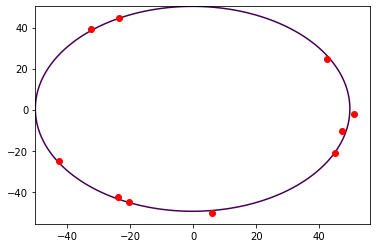

Residual norm: 2.8624130600401676


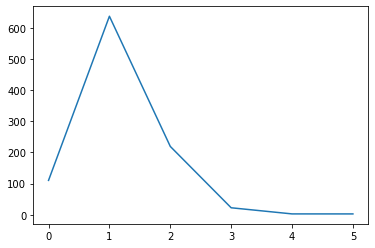

In [94]:
p = [50, 50, 100]
r_list = []
plt.figure()
plot_guess(p)
for i in range(6):
    plt.figure()
    r = residual(p)
    r_list.append(la.norm(r, 2))
    p = p + gauss_newton_method(jacobian(p), residual(p))
    
    plot_guess(p)

plt.plot(range(len(r_list)), r_list)